In [1]:
"""
        SETUP ENVIRONMENT
"""
from enviroment import *
import gymnasium as gym
"""
Some environments to try
'CartPole-v1'
'Maze-sample-5x5-v0'
'MountainCar-v0'
'FrozenLake-v1': 'FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False
FrozenLake8x8-v1: 'FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False
"""
env = gym.make('CartPole-v1')
# Define a custom reward dictionary

obs , _= env.reset()
try:
    obs_dim = len(obs)
except BaseException:
    obs_dim = 1
action_dim = env.action_space.n
print("State dim:", obs_dim)
print("Action dim:", action_dim)

State dim: 4
Action dim: 2


In [2]:
"""
    Maze environment custom (Run only in a case of Maze environment)
"""
from maze_env import CustomMazeEnv
from enviroment import run_env_step
env = CustomMazeEnv()
state = env.reset()
env.render()
obs_dim = 2
action_dim = env.action_space.n
print("State dim:", obs_dim)
print("Action dim:", action_dim)

A . . . . 
. . . . . 
. . # . . 
. . . . . 
. . . . G 

State dim: 2
Action dim: 4


In [2]:
"""
        SETUP AGENT
"""
# REINFORCE
BETA1 = 0.1
BETA2 = 0.9
from try_grad_policy import PolicyNet
policy = PolicyNet(n_inputs = obs_dim, n_outputs= env.action_space.n, hidden_dim=128)  # Create a policy network$
policy.ntk_init(beta=BETA1)
ntk_policy = PolicyNet(n_inputs = obs_dim, n_outputs= env.action_space.n, hidden_dim=128)  # Create a policy with ntk parametrization
ntk_policy.ntk_init(beta=BETA2)
#ACTOR-CRITIC
from actor_critic import Actor, Critic
actor = Actor(obs_dim, env.action_space.n)
critic = Critic(obs_dim)

In [ ]:
"""
        TRAINING (REINFORCE)
"""
import torch
from utils import run_episodes
LEARNING_RATE = 0.001
NUM_EPOCHES = 400
N_EPISODES = 10 # ^number of episodes per epoch
"""-------------------------------------------------------------------"""
import torch.optim as optim
from try_grad_policy import train_policy
import matplotlib.pyplot as plt
import multiprocessing

optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
optimizer_ntk = optim.Adam(ntk_policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
initialize_env(env, obs_dim = obs_dim)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list = []
loss_ntk_list = []
# Train for a number of epochs
print(f"beta1 = {BETA1}    beta2 = {BETA2}")
for epoch in range(NUM_EPOCHES ):
    episodes = run_episodes(policy, env, n_episodes=N_EPISODES, obs_dim= obs_dim, game= "NON")  # Collect episodes
    episodes_ntk = run_episodes(ntk_policy, env, n_episodes=N_EPISODES,  obs_dim= obs_dim, game= "NON")  # Collect episodes

    loss = train_policy(policy, optimizer, episodes)  # Update the policy based on the episodes
    loss_ntk = train_policy(ntk_policy, optimizer_ntk, episodes_ntk)  # Update the policy based on the episodes
    loss_list.append(loss)
    loss_ntk_list.append(loss_ntk)
    print(f"Episode {epoch + 1}")
    print(f'Loss: {loss}  and  {loss_ntk}')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list)),loss_list, label=f"{BETA1}")
ax1.scatter(range(len(loss_ntk_list)),loss_ntk_list, label=f"{BETA2}")
ax1.grid()
ax1.legend()


In [8]:
""" TEST AGENT"""
"-------------------TEST-------------------"
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode = "human" )
run_episodes(policy, env, n_episodes=10)
env.reset()
run_episodes(ntk_policy, env, n_episodes=10)
close_env(env)

A . . . . 
. . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
A . . . . 
. . # . . 
. . . . . 
. . . . G 

A . . . . 
. . . . . 
. . # . . 
. . . . . 
. . . . G 

A . . . . 
. . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
A . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
. . . . . 
A . # . . 
. . . . . 
. . . . G 

. . . . . 
. . . . . 
A . # . . 
. . . . . 
. . . . G 

. . . . . 
. . . . . 
. A # . . 
. . . . . 
. . . . G 

. . . . . 
. A . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
A . . . . 
. . # . . 
. . . . . 
. . . . G 

A . . . . 
. . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
A . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
A . . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
. A . . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
. . A . . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
. . . A . 
. . # . . 
. . . . . 
. . . . G 

. . . . . 
. . . . . 
. . # A . 
. . . . . 
. . . . G 

. . . . . 
. . . . . 
. . # . A 
. . . . . 
. . 

State dim: 4
Action dim: 2
beta1 = 0.5 


C:\Users\koq1231\PycharmProjects\RL\mtrshka.py:136: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  input_vector_tensor = torch.FloatTensor((input_vector))


Episode 1
Reward: 13.8 
Episode 11
Reward: 17.7 
Episode 21
Reward: 50.7 
Episode 31
Reward: 42.5 
Episode 41
Reward: 82.8 
Episode 51
Reward: 115.5 
Episode 61
Reward: 181.8 
Episode 71
Reward: 310.5 
Episode 81
Reward: 323.8 
Episode 91
Reward: 431.1 
Episode 101
Reward: 657.5 
Episode 111
Reward: 631.8 
Episode 121
Reward: 500.1 
Episode 131
Reward: 644.8 
Episode 141
Reward: 745.1 
Episode 151
Reward: 834.7 
Episode 161
Reward: 959.7 
Episode 171
Reward: 896.3 
Episode 181
Reward: 939.6 
Episode 191
Reward: 1000.0 
Episode 201
Reward: 939.8 
Episode 211
Reward: 983.4 
Episode 221
Reward: 935.6 
Episode 231
Reward: 987.2 
Episode 241
Reward: 975.9 
Episode 251
Reward: 1000.0 
Episode 261
Reward: 975.0 
Episode 271
Reward: 988.1 
Episode 281
Reward: 992.3 
Episode 291
Reward: 957.9 


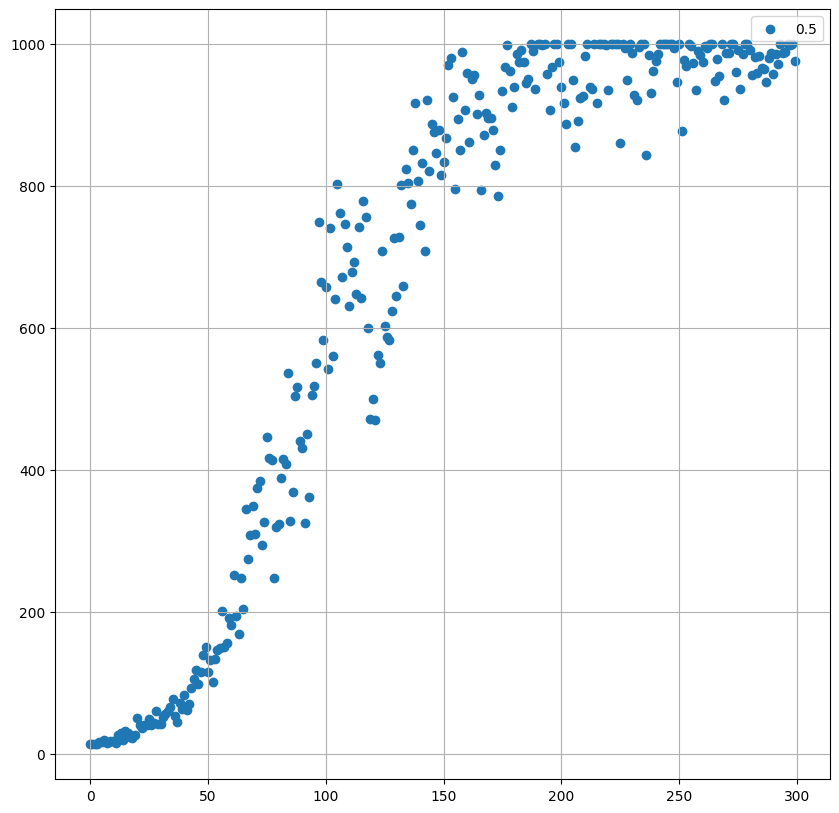

In [1]:
"""
    Matryoshka
"""
from enviroment import *
import gymnasium as gym
import torch.optim as optim
from mtrshka import train_policy_mtr, PolicyNet
import matplotlib.pyplot as plt
from utils import run_episodes_mtr
LEARNING_RATE = 0.001
NUM_EPOCHES = 300
N_EPISODES = 10 # ^number of episodes per epoch
BETA = 0.5
env = gym.make("CartPole-v1")
obs , _= env.reset()
try:
    obs_dim = len(obs)
except BaseException:
    obs_dim = 1
action_dim = env.action_space.n
print("State dim:", obs_dim)
print("Action dim:", action_dim)
"""-------------------------------------------------------------------"""
policy = PolicyNet(n_inputs = obs_dim + 1, n_outputs= env.action_space.n, hidden_dim=32)  # Create a policy network$
policy.ntk_init(beta=BETA)
optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
initialize_env(env, obs_dim = obs_dim)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list = []
# Train for a number of epochs
print(f"beta1 = {BETA} ")
for epoch in range(NUM_EPOCHES ):
    episodes = run_episodes_mtr(policy, env, n_episodes=N_EPISODES,horizon=1000, obs_dim= obs_dim, game= "NON")  # Collect episodes

    loss = train_policy_mtr(policy, optimizer, episodes, clip_grad=False)  # Update the policy based on the episodes
    loss_list.append(loss)
    if epoch%10 == 0:
        print(f"Episode {epoch + 1}")
        print(f'Reward: {loss} ')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list)),loss_list, label=f"{BETA}")
ax1.grid()
ax1.legend()

In [4]:
env = gym.make("CartPole-v1", render_mode = "human")
for epoch in range(10 ):
    episodes = run_episodes_mtr(policy, env, n_episodes=1,horizon=1000, obs_dim= obs_dim, game= "NON")  # Collect episodes
    env_reset(env)
env.close()

In [ ]:
"""
        TRAINING (REINFORCE) PARALLEL
"""

LEARNING_RATE = 0.01
NUM_EPOCHES = 30
N_EPISODES = 20 # ^number of episodes per epoch
"""-------------------------------------------------------------------"""
import torch.optim as optim
from try_grad_policy import train_policy
import multiprocessing

optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
optimizer_ntk = optim.Adam(ntk_policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer


initialize_env(env)

output_queue1 = multiprocessing.Queue()
output_queue2 = multiprocessing.Queue()
run_process1 = multiprocessing.Process(target=run_episodes, args=(policy, env,output_queue1, N_EPISODES))
run_process2 = multiprocessing.Process(target=run_episodes, args=(ntk_policy, env,output_queue2, N_EPISODES))


# Train for a number of epochs
for epoch in range(NUM_EPOCHES ):
    run_process1.start()  # Collect episodes
    run_process2.start()
    # Join the processes to wait for them to finish
    run_process1.join()
    run_process2.join()
    # Get the outputs from both processes
    episodes = output_queue1.get()
    ntk_episodes = output_queue2.get()
    loss = train_policy(policy, optimizer, episodes)  # Update the policy based on the episodes
    ntk_loss = train_policy(ntk_policy, optimizer_ntk, ntk_episodes)  # Update the ntk_policy based on the episodes
    print(f'Episode {epoch + 1}, Total Loss: {BETA1}={loss} and {BETA2}={ntk_loss} ')
close_env(env)
"-------------------TEST-------------------"
env = gym.make('CartPole-v1', render_mode = "human" )
run_episodes(policy, env, n_episodes=10)

In [6]:
"""
        RUN EPISODES (TD)
"""
# We do online update at each step
import torch.optim as optim
actor_optimizer = optim.Adam(actor.parameters(), lr=0.01)
critic_optimizer = optim.Adam(critic.parameters(), lr=0.01)
import numpy as np

def collect_and_update(actor,critic, env, n_episodes=10):
    run = 0
    gamma = 0.99
    rewards = []
    while(run<n_episodes):
        reward_ = 0
        truncated =  False
        terminated = False
        state = env.reset()
        state = state[0]
        while(not terminated):
            # Actor decides action
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            probs = actor(state_tensor)
            action = torch.multinomial(probs, num_samples=1).item()

            # Take action in the environment
            next_state, reward, terminated, truncated, info = run_env_step(env,action=action, random_action=False)


            # Critic evaluates the action
            state_value = critic(state_tensor)
            next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
            next_state_value = critic(next_state_tensor)
            target = reward + gamma * next_state_value
            td_error = target - state_value


            # Update Critic
            critic_loss = td_error.pow(2)
            critic_optimizer.zero_grad()
            critic_loss.backward(retain_graph=True)
            critic_optimizer.step()

            # Update Actor using the Advantage (TD Error)
            actor_loss = -torch.log(probs[0, action]) * td_error.detach()
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()
            state = next_state
            reward_ += 1
        rewards.append(reward_)

        run += 1
    return np.mean(rewards)

In [ ]:
"""
        TRAINING (ACTOR-CRITIC)
"""
NUM_EPOCHES = 100
initialize_env(env)
# Train for a number of epochs
for epoch in range(NUM_EPOCHES):
    result=collect_and_update(actor,critic,env,10)
    print("Epoch: ", epoch, "Reward: ", result)
close_env(env)